In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [44]:
df = pd.read_csv("data/spam.csv", encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()

In [46]:
df.shape

(5572, 2)

In [47]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   label    5572 non-null   str  
 1   message  5572 non-null   str  
dtypes: str(2)
memory usage: 87.2 KB


In [48]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

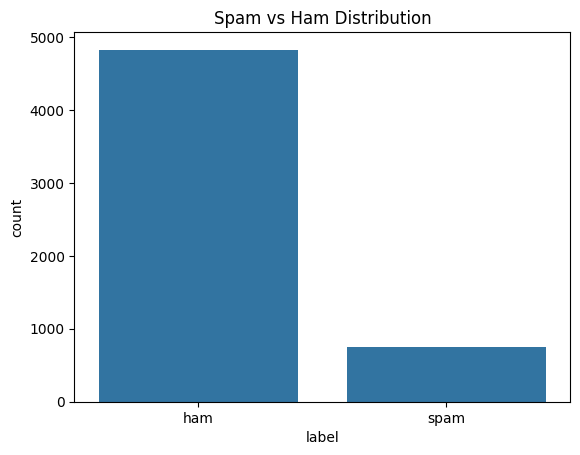

In [49]:
sns.countplot(x='label', data=df)
plt.title("Spam vs Ham Distribution")
plt.show()

In [50]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [51]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\SUJAL
[nltk_data]     CHOWDHARY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
ps = PorterStemmer()

def clean_text(text):
    text = text.lower()

    text = ''.join([char for char in text if char not in string.punctuation])

    words = text.split()

    words = [word for word in words if word not in stopwords.words('english')]

    words = [ps.stem(word) for word in words]

    return " ".join(words)

df['cleaned_message'] = df['message'].apply(clean_text)
df.head()


,label,message,cleaned_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though
